In [1]:
# Código desenvolvido com a versão do python 3.8.10

In [2]:
import cv2
import dlib
import matplotlib.pyplot as plt

In [3]:
print ("versão OpenCV: ", cv2.__version__)
print ("versão dlib:   ", dlib.__version__)

versão OpenCV:  3.4.8
versão dlib:    19.22.99


In [4]:
imagem = cv2.imread(r"data\images\px-girl.jpg")

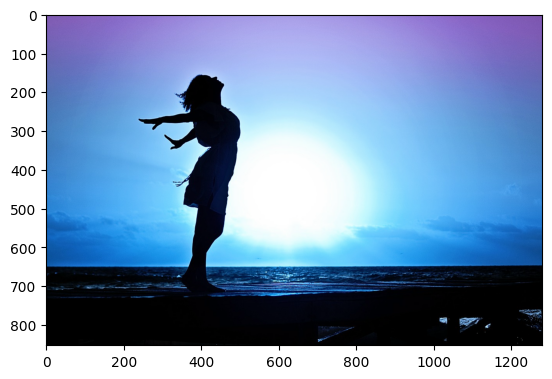

In [5]:
plt.imshow(imagem)

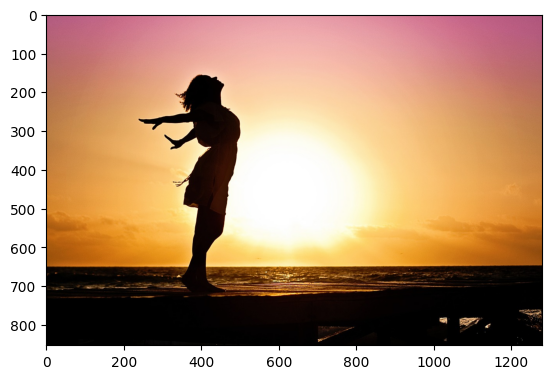

In [6]:
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem_rgb)

In [7]:
imagem_rgb.shape

(853, 1280, 3)

(853, 1280)


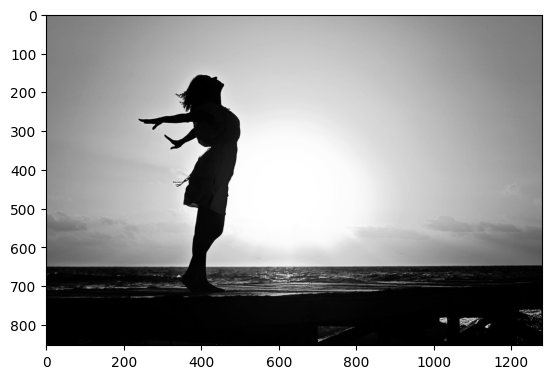

In [8]:
imagem_gray = cv2.cvtColor(imagem_rgb, cv2.COLOR_RGB2GRAY)
print(imagem_gray.shape)
plt.imshow(imagem_gray, cmap="gray")

(853, 1280, 3)


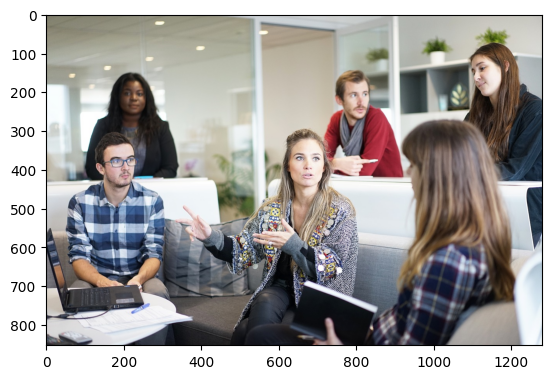

In [9]:
imagem = cv2.imread(r"data\images\px-people.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
print(imagem.shape)
plt.imshow(imagem)

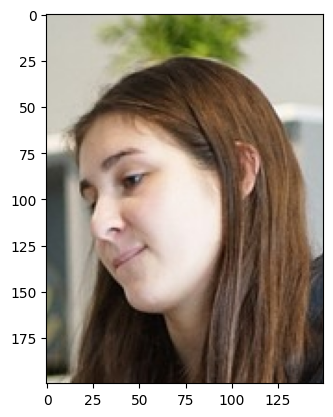

In [10]:
# roi = region of interest
imagem_roi = imagem[50:250, 1080:1230]
plt.imshow(imagem_roi)

In [11]:
imagem_roi_bgr = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
cv2.imwrite("data\images\imagem_roi.jpg", imagem_roi_bgr)

True

(660, 995, 3)


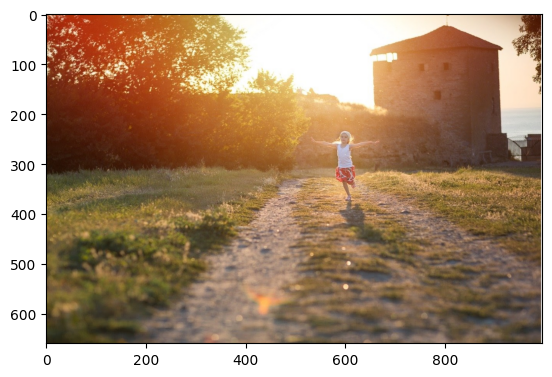

In [12]:
# desafio: Depois de separar o corpo inteiro da imagem, converta somente a região de interesse para o espaço
# de cores de escala de cinza (parecido com o "preto e branco" das TVs antigas) e, ao final, insira na imagem original,
# obtendo uma imagem colorida e somente a área do corpo inteiro na imagem ficará em escala de cinza.

imagem = cv2.imread("data\images\ex-01.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_RGB2BGR)
print(imagem.shape)
plt.imshow(imagem)

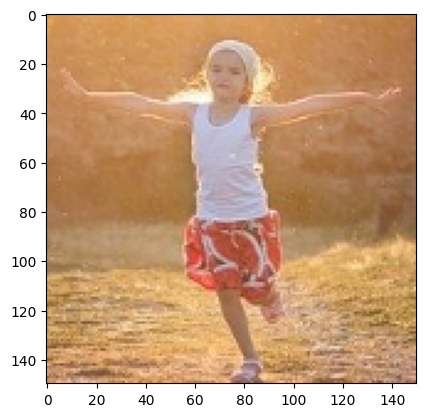

In [13]:
imagem_roi = imagem[225:375, 525:675]
plt.imshow(imagem_roi)

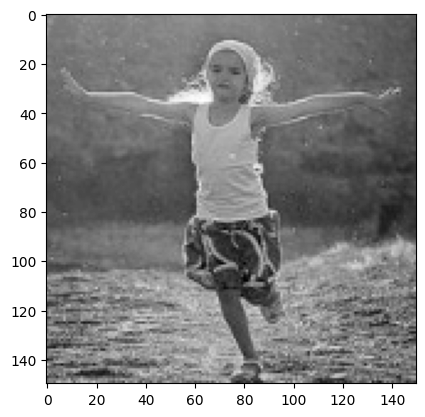

In [14]:
imagem_roi_gray = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2GRAY)
plt.imshow(imagem_roi_gray, cmap="gray")

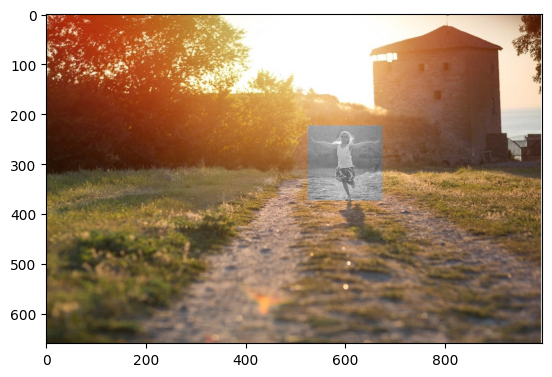

In [15]:
imagem_roi_rgb = cv2.cvtColor(imagem_roi_gray, cv2.COLOR_GRAY2RGB)
imagem[225:375, 525:675] = imagem_roi_rgb
plt.imshow(imagem)

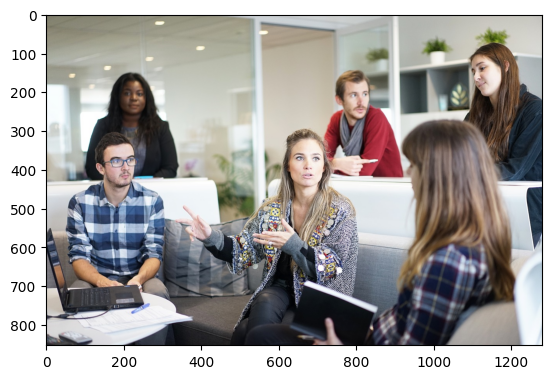

In [16]:
imagem = cv2.imread("data\images\px-people.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)

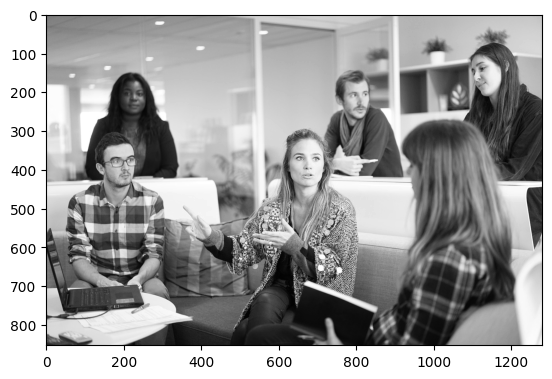

In [17]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
plt.imshow(imagem_gray, cmap="gray")

In [18]:
classificador = cv2.CascadeClassifier("data\classificadores\haarcascade_frontalface_default.xml")

In [19]:
faces = classificador.detectMultiScale(imagem_gray, 1.3, 5)
len(faces)

5

In [20]:
print(faces[0])

[1088  102  101  101]


In [21]:
imagem_anotada = imagem.copy()

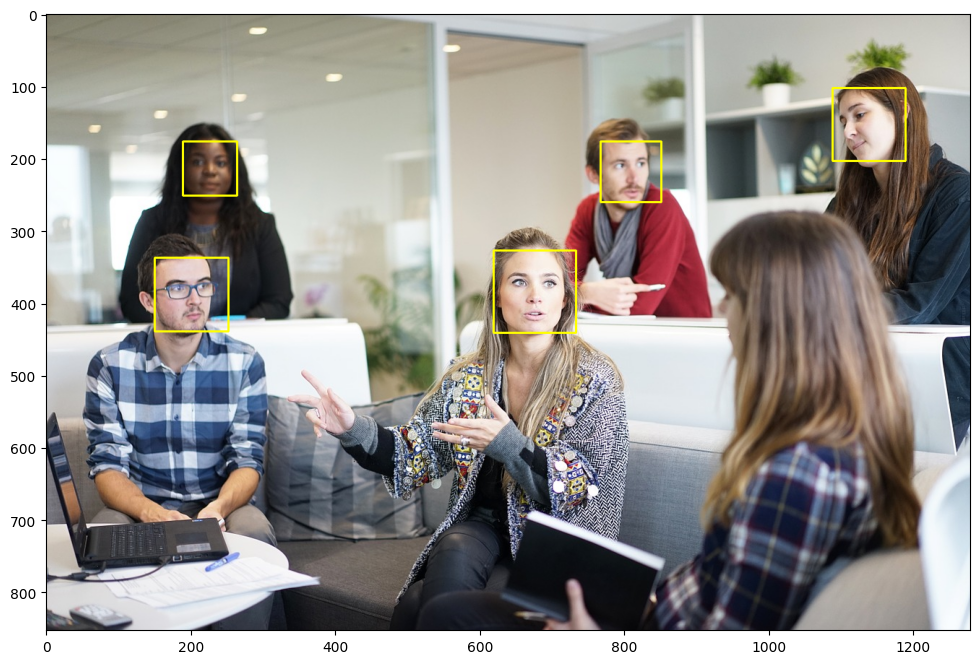

In [22]:
for (x, y, h, w) in faces:
    cv2.rectangle(imagem_anotada, (x,y), (x+w, y+h), (255, 255, 0), 2)

plt.figure(figsize=(16,8))
plt.imshow(imagem_anotada)

In [23]:
face_imagem = 0

for(x, y, w, h) in faces:
    face_imagem +=1
    imagem_roi = imagem[y:y+h, x:x+w]
    imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite("face_" + str(face_imagem) + ".png", imagem_roi)
    print(face_imagem)

1
2
3
4
5


In [24]:
# Recortar o rosto das 3 imagens

imagens = []
for i in range(1,4):
    imagem = cv2.imread(f"data\images\ex-02_0{str(i)}.png")
    imagens.append(imagem)

In [25]:
for i in range(len(imagens)):
    imagens[i] = cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB)

In [26]:
imagens_gray = []
for i in range(len(imagens)):
    imagem_gray = cv2.cvtColor(imagens[i], cv2.COLOR_BGR2GRAY)
    imagens_gray.append(imagem_gray)

In [27]:
lista_pontos_faces = []
for i in range(len(imagens_gray)):
    face = classificador.detectMultiScale(imagens_gray[i], 1.3, 5)
    lista_pontos_faces.append(face)
lista_pontos_faces

[array([[450, 196, 101, 101]], dtype=int32),
 array([[409,  87, 121, 121]], dtype=int32),
 array([[324,  50, 390, 390]], dtype=int32)]

In [28]:
faces = []
for i in range(len(imagens)):
    for(x, y, w, h) in lista_pontos_faces[i]:
        imagem_roi = imagens[i][y:y+h, x:x+w]
        faces.append(imagem_roi)

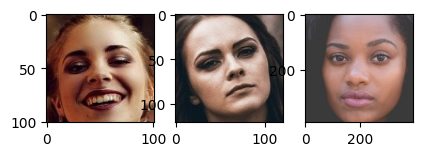

In [29]:
for i in range(len(faces)):
    plt.subplot(1, len(faces)+1, i+1)
    plt.imshow(faces[i])